In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
dataset=pd.read_csv('Clean_Dataset.csv')

In [64]:
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [65]:
dataset.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [66]:
dataset.shape

(300153, 12)

In [67]:
# Summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


This shows that there are no null values in the dataset. Hence next I checked the unique values in each column

In [68]:
dataset.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [69]:
# Getting the Statistical information for the numerical column(duration,days_left,price)
dataset.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [70]:
dataset=dataset.drop('Unnamed: 0', axis=1)
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [71]:
dataset.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [72]:
dataset.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

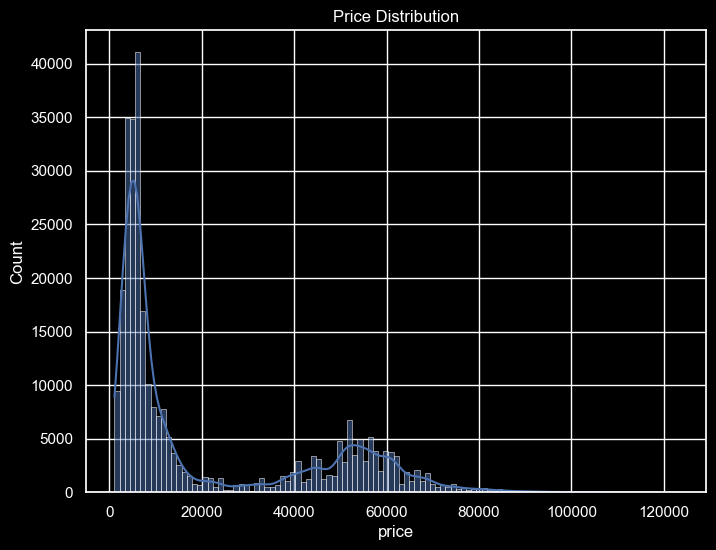

In [73]:
# Plotting the count of flights for various prices.

plt.figure(figsize=(8,6))
plt.title('Price Distribution')
sns.histplot(data=dataset,x='price',kde='true')
plt.show()

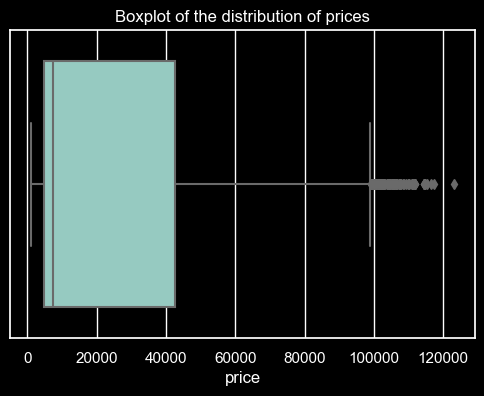

In [74]:
# Adding a box plot to see the distribution more clearly

plt.figure(figsize=(6,4))
plt.title('Boxplot of the distribution of prices')
sns.boxplot(data=dataset, x='price')
plt.show()


In [75]:
# Checking the distribution of flights that are prices >100000

altered_dataset=dataset[dataset['price']>100000]
print (altered_dataset)

        airline  flight source_city departure_time        stops arrival_time  \
215858  Vistara  UK-809       Delhi        Evening  two_or_more      Evening   
215859  Vistara  UK-809       Delhi        Evening  two_or_more      Evening   
216025  Vistara  UK-817       Delhi        Evening  two_or_more      Morning   
216095  Vistara  UK-963       Delhi        Morning          one      Evening   
216096  Vistara  UK-811       Delhi  Early_Morning  two_or_more      Evening   
...         ...     ...         ...            ...          ...          ...   
293474  Vistara  UK-836     Chennai        Morning          one        Night   
296001  Vistara  UK-838     Chennai          Night          one      Morning   
296081  Vistara  UK-832     Chennai  Early_Morning          one        Night   
296170  Vistara  UK-838     Chennai          Night          one      Morning   
296404  Vistara  UK-838     Chennai          Night          one      Evening   

       destination_city     class  dura

In [76]:
#To check the class of the flight tickets that cost more than 100000

class_above_100000=altered_dataset['class']
class_above_100000.value_counts()

Business    108
Name: class, dtype: int64

This shows that all the flight tickets had aprice above 100000 are business class ticketsand 108 have people have bought them!

In [77]:
#Creating a temporary data frame to check the popularity of airlines

dataset_flight=dataset.groupby(['airline','flight'], as_index=False).size()

dataset_flight.head()

,airline,flight,size
0,AirAsia,I5-1228,144
1,AirAsia,I5-1229,408
2,AirAsia,I5-1321,83
3,AirAsia,I5-1426,139
4,AirAsia,I5-1427,2


In [78]:
#Grouping of airlines to see the count of the number of flights by each airline

dataset_flight.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

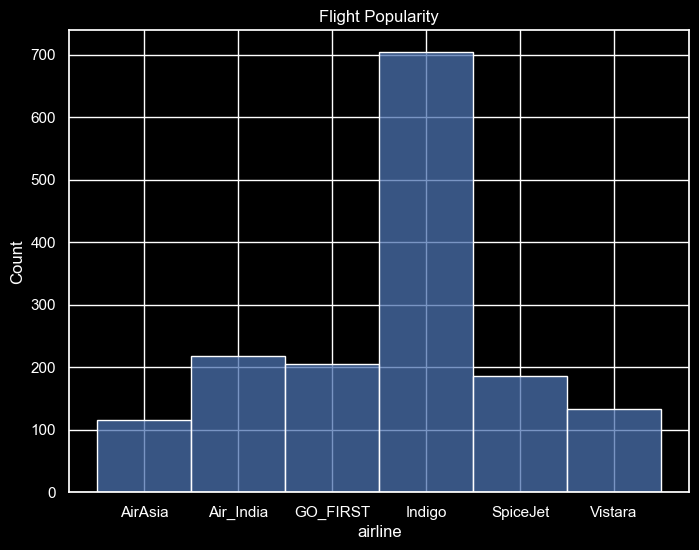

In [79]:
#PLotting a bar graph to see the popularity of each flight based on the count
plt.figure(figsize=(8,6))
plt.title('Flight Popularity')
sns.histplot(data=dataset_flight,x='airline')
plt.show()

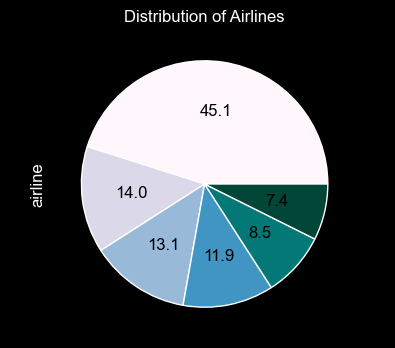

In [80]:
#Plotting a pie chart for the distribution of airlines
plt.figure(figsize=(6,4))
plt.title('Distribution of Airlines')
dataset_flight['airline'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%1.1f',cmap='PuBuGn')

plt.show()


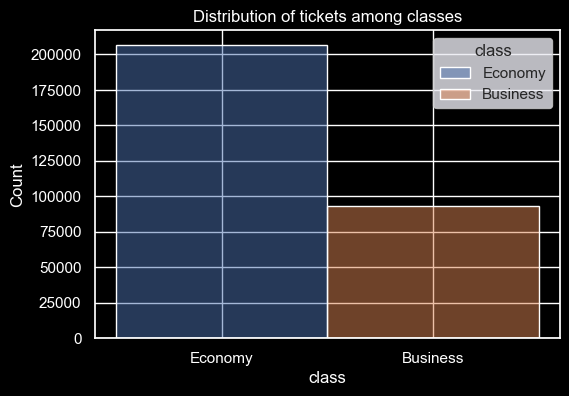

In [81]:
#PLotting a pie and bar chart to see the distribution of tickets between business and economy class.

#Bar Graph
plt.figure(figsize=(6,4))
plt.title('Distribution of tickets among classes')
sns.set(style='darkgrid')
sns.histplot(data=dataset, x='class', hue='class')
plt.show()

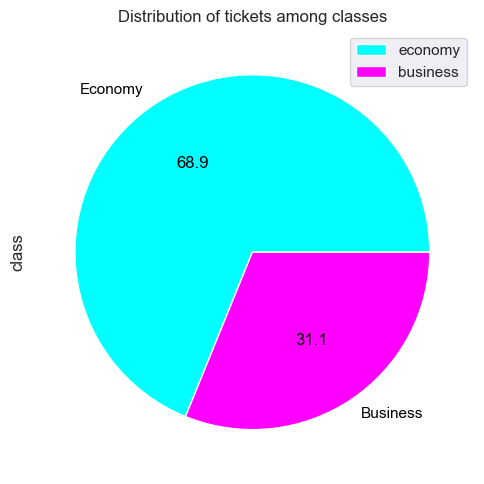

In [82]:
#Pie Chart

plt.figure(figsize=(7,5))
plt.title('Distribution of tickets among classes')
dataset['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%1.1f',cmap='cool')
plt.legend(['economy','business'],loc='upper right')
plt.tight_layout()
plt.show()

In [83]:
#Alternative dataset for price by airline


# dataset_price_airline=dataset.groupby(['airline','price'], as_index=False).size()

price_stats_by_category = dataset.groupby('airline')['price'].agg(['mean', 'median', 'min', 'max', 'std'])
print(price_stats_by_category)


                   mean   median   min     max           std
airline                                                     
AirAsia     4091.072742   3276.0  1105   31917   2824.055172
Air_India  23507.019112  11520.0  1526   90970  20905.116909
GO_FIRST    5652.007595   5336.0  1105   32803   2513.865560
Indigo      5324.216303   4453.0  1105   31952   3268.894831
SpiceJet    6179.278881   5654.0  1106   34158   2999.630406
Vistara    30396.536302  15543.0  1714  123071  25637.159445


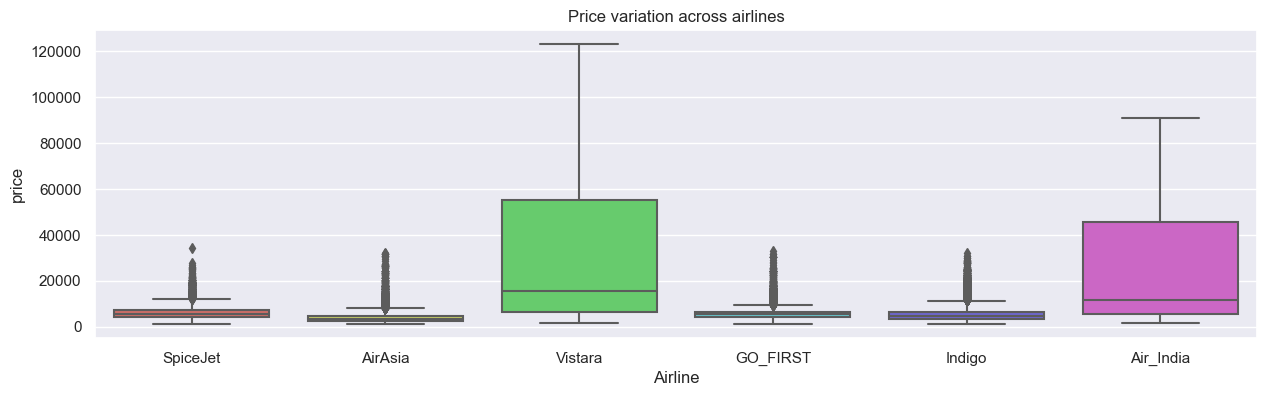

In [84]:
#Checking price across Air lines


#Box PLot

plt.figure(figsize=(15,4))
plt.title('Price variation across airlines')
sns.boxplot(x=dataset['airline'],y=dataset['price'],palette='hls')
plt.xlabel('Airline')
plt.ylabel('price')
plt.show()
    

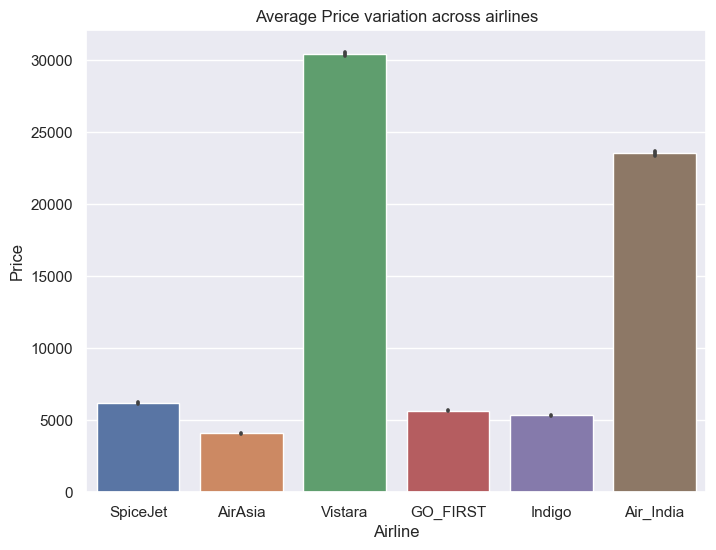

In [85]:
#bar graph to see the average price of each airline
plt.figure(figsize=(8,6))
plt.title('Average Price variation across airlines')
sns.set(style='whitegrid')
sns.barplot(data=dataset, x='airline',y='price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

<AxesSubplot:title={'center':'Price variation across airlines'}, xlabel='airline', ylabel='price'>

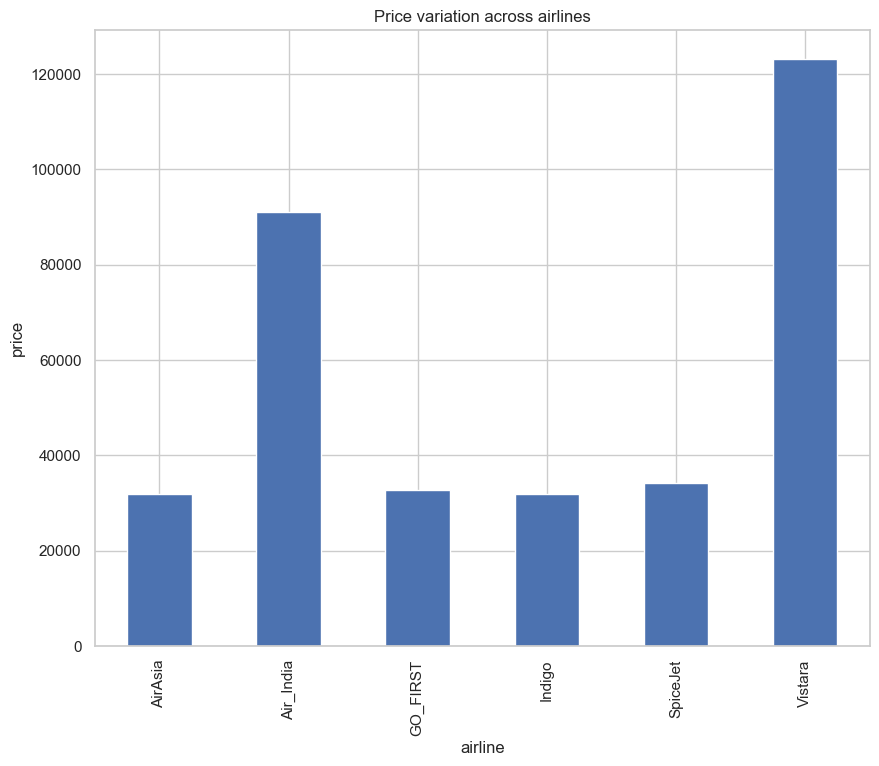

In [125]:
max_prices = dataset.groupby('airline')['price'].max()
plt.figure(figsize=(10,8))
plt.title('Price variation across airlines')
plt.xlabel('Airline')
plt.ylabel('price')
max_prices.plot(kind='bar')

This shows:
1. Vistara is the most expensive among others.
2. Air_India  is the second most expensive flight
3. Indigo , Gofirst and spicejet have a similar price range


In [87]:
#Dependence of ticket price over class

class_df=dataset.groupby('class')['price'].describe()
class_df

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


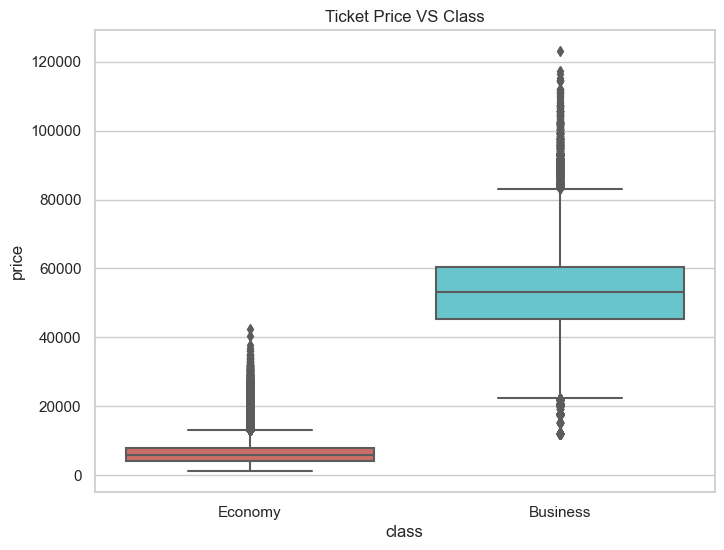

In [88]:
# Ticket Price variation among classes

plt.figure(figsize=(8,6))
plt.title('Ticket Price VS Class')
plt.xlabel('class')
plt.ylabel('Price')

sns.boxplot(x='class',y='price',data=dataset, palette='hls')
plt.show()

<AxesSubplot:xlabel='class', ylabel='price'>

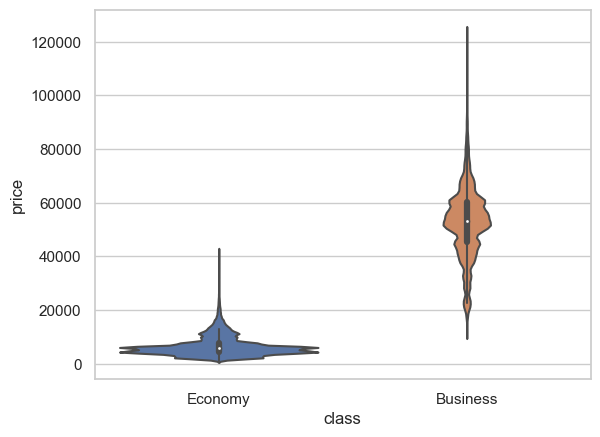

In [89]:
sns.violinplot(x='class', y='price', data=dataset)

In [90]:
#sns.swarmplot(x='class', y='price', data=dataset)

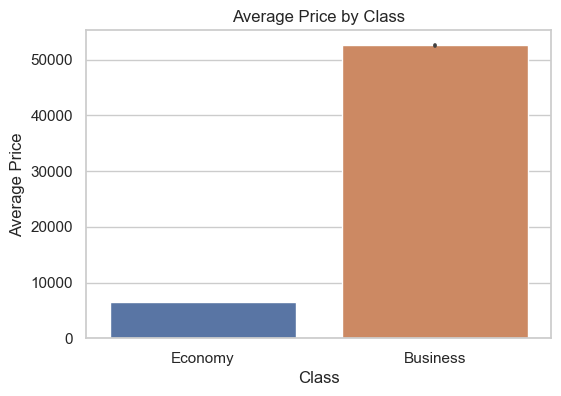

In [91]:
plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='price', data=dataset)
plt.title('Average Price by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()

In [92]:
#Checking the dependence of No_of_Stops on price

no_of_stops= dataset.groupby('stops')['price'].describe()
no_of_stops

,count,mean,std,min,25%,50%,75%,max
stops,,,,,,,,
one,250863.0,22900.992482,23626.066584,1105.0,5136.0,7959.0,48851.0,123071.0
two_or_more,13286.0,14113.450775,17664.332033,1966.0,6432.0,8307.0,13419.0,117307.0
zero,36004.0,9375.938535,10623.008293,1105.0,2586.0,4499.0,8064.0,59573.0


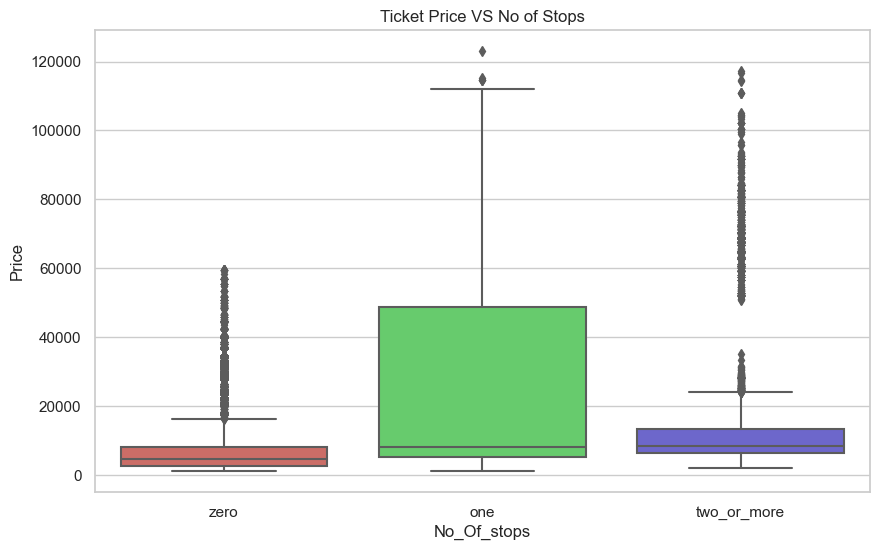

In [93]:
# Checking the price variation when compared to number of stops
plt.figure(figsize=(10,6))
sns.boxplot(x='stops',y='price',data=dataset,palette='hls')
plt.title('Ticket Price VS No of Stops')
plt.xlabel('No_Of_stops')
plt.ylabel('Price')
plt.show()

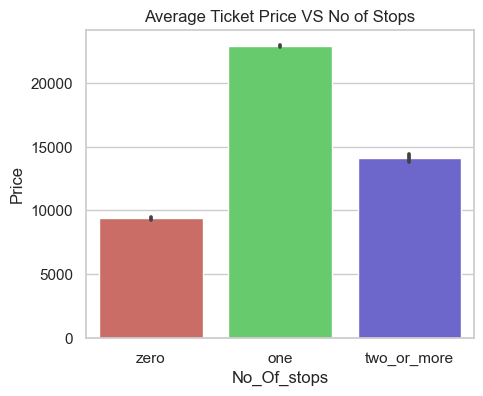

In [94]:
#Checking the average price of flights with respect to number of stops

plt.figure(figsize=(5,4))
sns.barplot(x='stops',y='price',data=dataset,palette='hls')
plt.title('Average Ticket Price VS No of Stops')
plt.xlabel('No_Of_stops')
plt.ylabel('Price')
plt.show()

This shows that Flights having one stop is the most expensive

In [95]:
# Checking How departure time affects the price

departure_time=dataset.groupby('departure_time')['price'].describe()
departure_time

,count,mean,std,min,25%,50%,75%,max
departure_time,,,,,,,,
Afternoon,47794.0,18179.203331,20928.840445,1105.0,4593.0,6663.0,27976.0,111437.0
Early_Morning,66790.0,20370.676718,22354.875275,1105.0,4757.0,7212.0,42424.0,117307.0
Evening,65102.0,21232.361894,23168.515406,1105.0,4593.0,7425.0,42521.0,116562.0
Late_Night,1306.0,9295.299387,13680.515549,2050.0,3393.0,4499.0,6459.5,56058.0
Morning,71146.0,21630.760254,22968.909569,1105.0,5208.0,8112.0,43865.0,123071.0
Night,48015.0,23062.146808,23617.883277,1105.0,4731.0,7813.0,49553.0,115211.0


Flights that are late at night are the cheapest with average price of 9295.299

In [96]:
arrival_time=dataset.groupby('arrival_time')['price'].describe()
arrival_time

,count,mean,std,min,25%,50%,75%,max
arrival_time,,,,,,,,
Afternoon,38139.0,18494.598993,20430.012514,1105.0,4542.0,6714.0,32923.0,115211.0
Early_Morning,15417.0,14993.139521,18898.694495,1105.0,3988.0,5800.0,12108.0,106416.0
Evening,78323.0,23044.371615,23494.642663,1105.0,5395.0,8854.0,49177.0,117307.0
Late_Night,14001.0,11284.906078,16399.121594,1105.0,3336.0,4867.0,7488.0,89257.0
Morning,62735.0,22231.076098,23266.076096,1105.0,4792.0,7687.0,45257.0,111964.0
Night,91538.0,21586.758341,23298.011624,1105.0,4979.0,7584.0,44280.0,123071.0


This shows that Flights that arrive late night/ early morning are relatively of the same price and cheaper when compared to others.

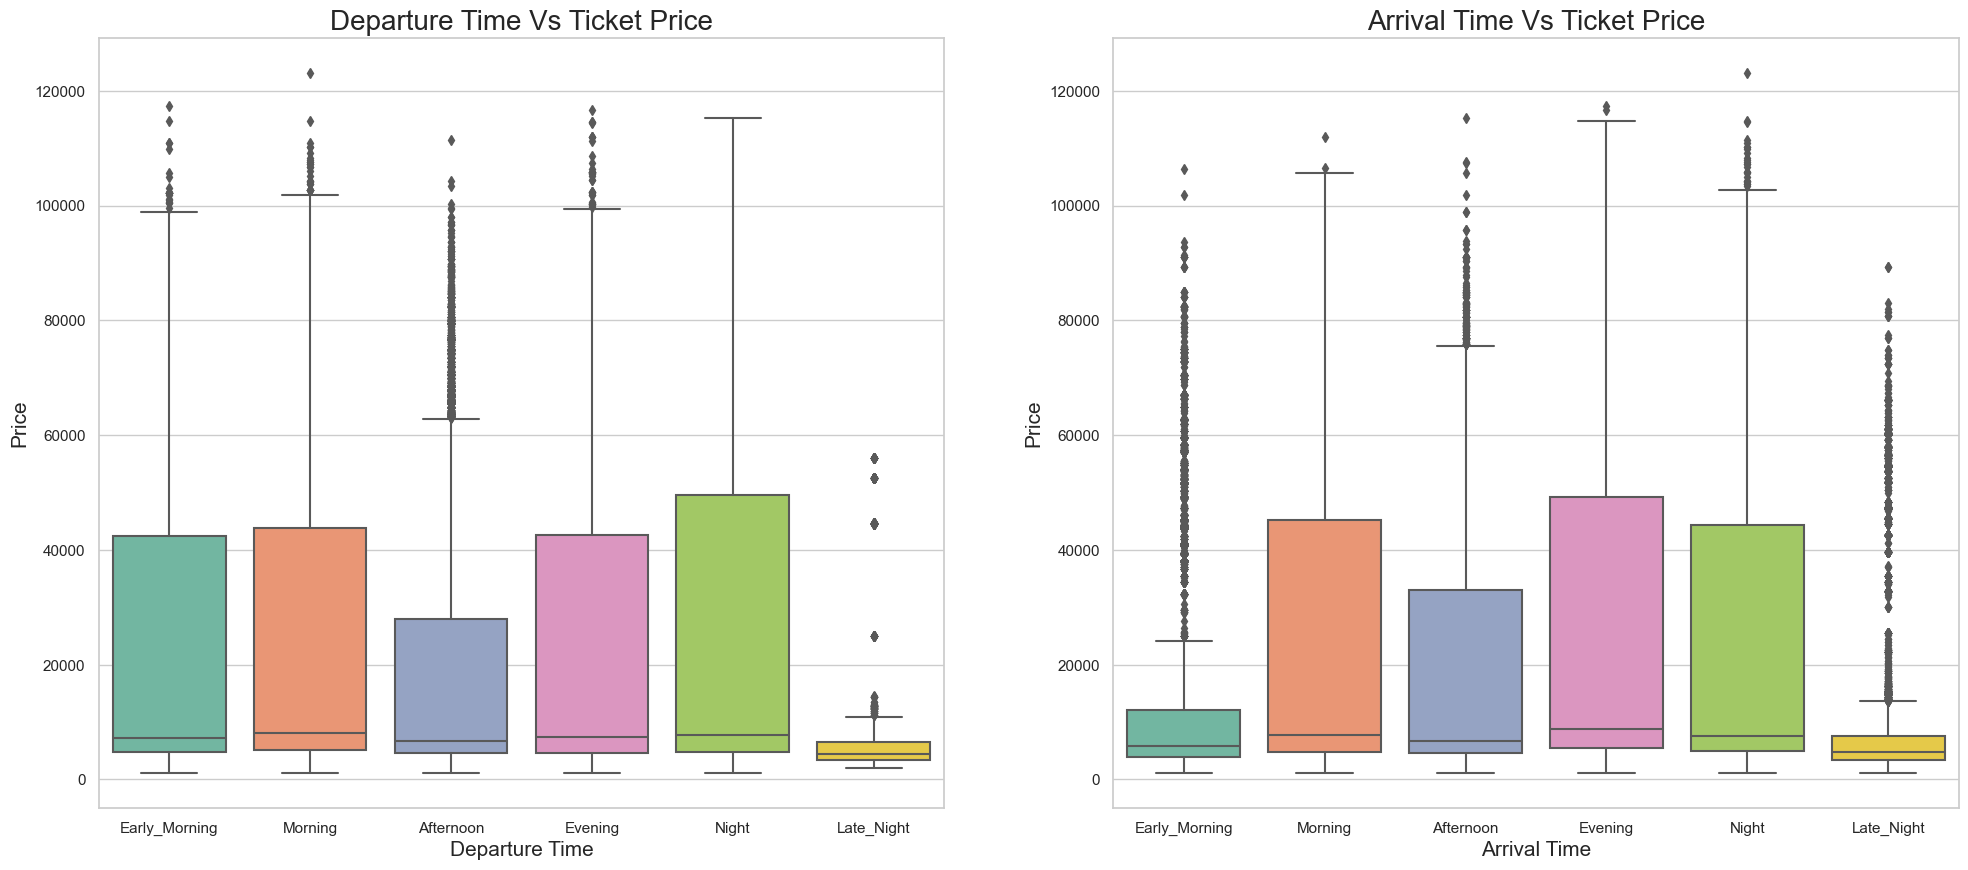

In [97]:
#Visualizing the price of tickets based on arrival and departure time

time_order = ['Early_Morning','Morning', 'Afternoon', 'Evening', 'Night','Late_Night']
color_palette = sns.color_palette("Set2", len(time_order))

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=dataset,order=time_order, palette=color_palette)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=dataset,order=time_order, palette=color_palette)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

This Shows as the when the departure time and arrival time is late_night then the price is cheap.As well as when the arrival time is early morning the flight is cheap

In [98]:
# Checking the dependence of source destination on price

source_city=dataset.groupby('source_city')['price'].describe()
source_city

,count,mean,std,min,25%,50%,75%,max
source_city,,,,,,,,
Bangalore,52061.0,21469.460575,23171.386433,1603.0,4687.0,7488.0,43865.0,111883.0
Chennai,38700.0,21995.339871,23527.227014,1105.0,4672.0,7846.0,45185.0,114704.0
Delhi,61343.0,18951.326639,20920.410359,1998.0,4496.0,6840.0,35490.0,117307.0
Hyderabad,40806.0,20155.623879,21720.652723,1543.0,4593.0,6855.0,41314.0,115211.0
Kolkata,46347.0,21746.235679,23439.972854,2436.0,5853.0,7958.0,49207.0,123071.0
Mumbai,60896.0,21483.818839,23394.131784,1890.0,4658.0,7413.0,45693.0,114523.0


Although we can see that there is not much variation in average price with respect to city Delhi proves to be the city with the cheapest flights.

In [99]:
#Checking the dependence of destination_city on price

destination_city=dataset.groupby('destination_city')['price'].describe()
destination_city

,count,mean,std,min,25%,50%,75%,max
destination_city,,,,,,,,
Bangalore,51068.0,21593.955784,23271.409165,1443.0,4727.75,7425.0,44144.0,114523.0
Chennai,40368.0,21953.323969,23189.300129,1543.0,4672.00,7900.0,45257.0,111964.0
Delhi,57360.0,18436.767870,20485.727116,2051.0,4439.00,6521.0,32923.0,123071.0
Hyderabad,42726.0,20427.661284,21840.231366,1105.0,4589.00,7548.0,41064.0,114705.0
Kolkata,49534.0,21959.557556,23750.590141,2056.0,5293.25,7767.0,49725.0,117307.0
Mumbai,59097.0,21372.529469,23409.185278,1830.0,4792.00,7496.0,44025.0,115211.0


Although we can see that there is not much variation in average price with respect to city Delhi proves to be the city with the cheapest flights.

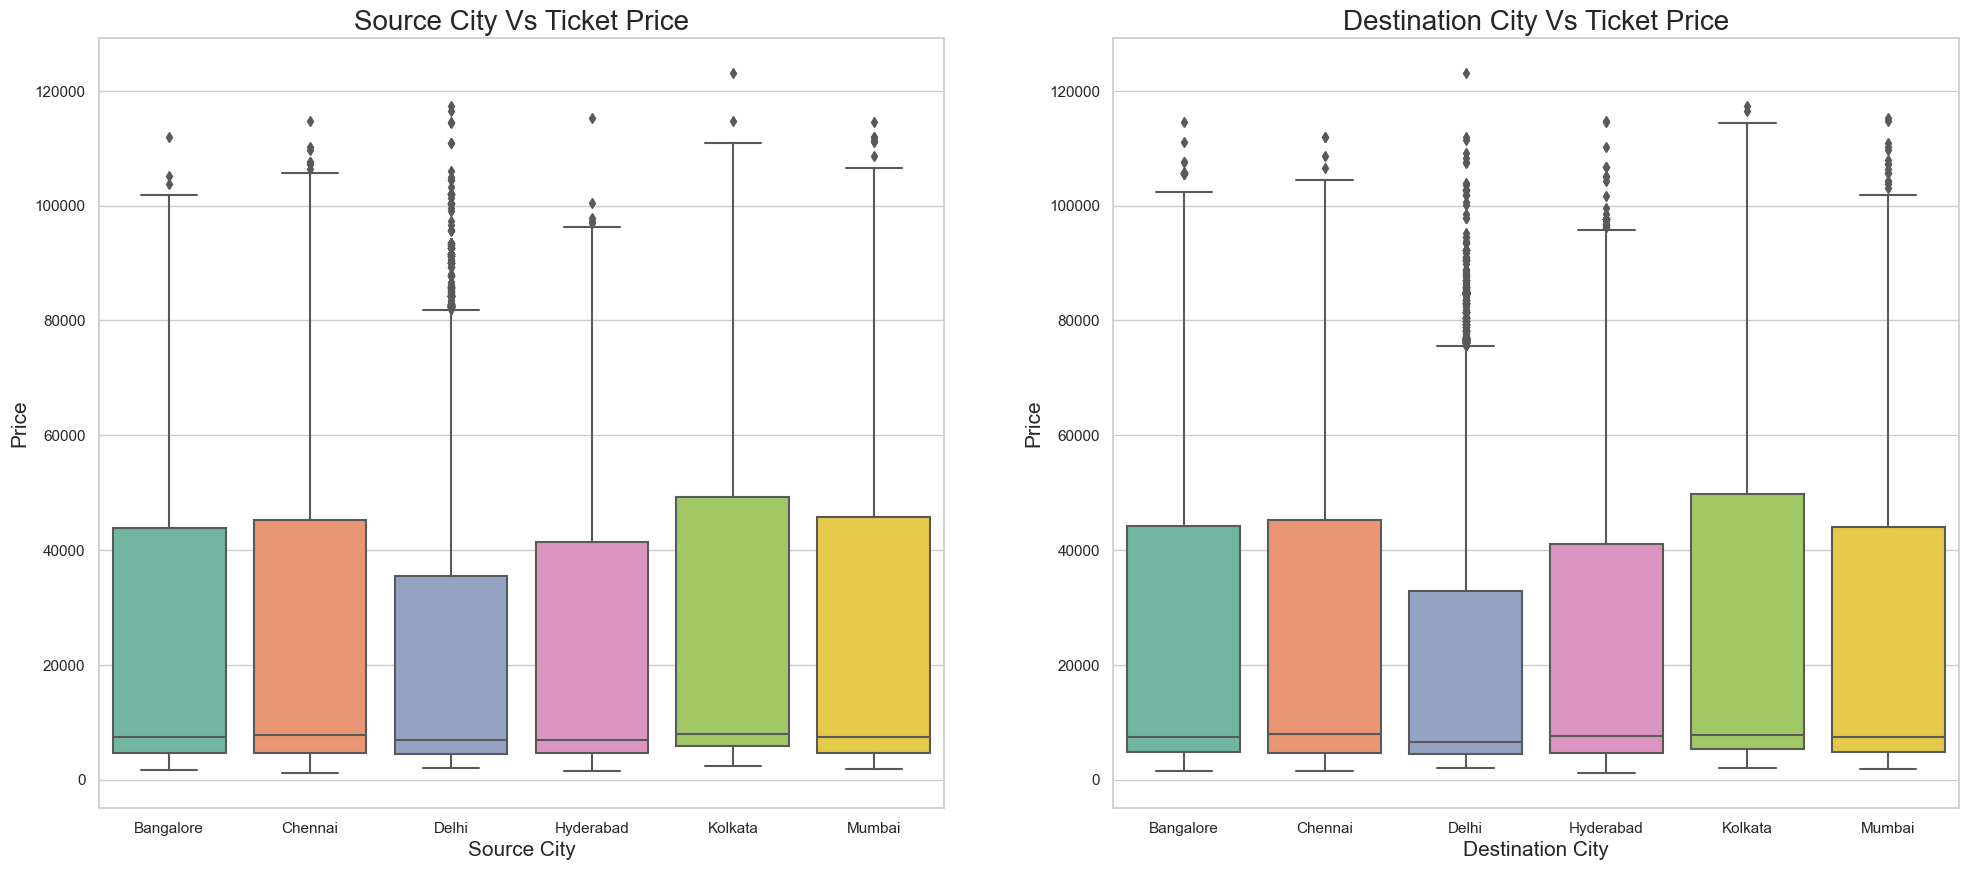

In [100]:
#Visualising the dependence of prive on Source and Destination cities.
#Visualizing the price of tickets based on arrival and departure time

place_order = ['Bangalore','Chennai', 'Delhi', 'Hyderabad', 'Kolkata','Mumbai']
color_palette = sns.color_palette("Set2", len(time_order))

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=dataset,order=place_order,palette=color_palette)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=dataset,order=place_order,palette=color_palette)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()



In [101]:
# To check the dependece of price over days left and duration

dataset.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<AxesSubplot:>

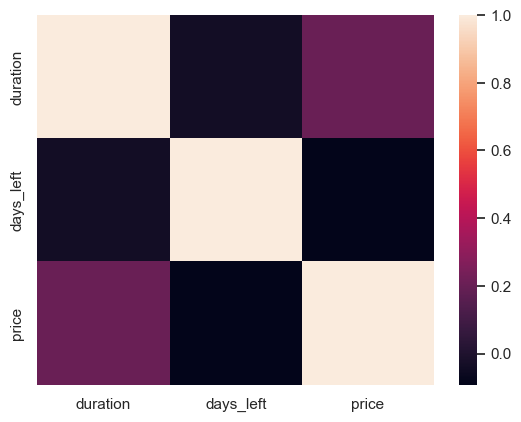

In [102]:
sns.heatmap(dataset.corr())

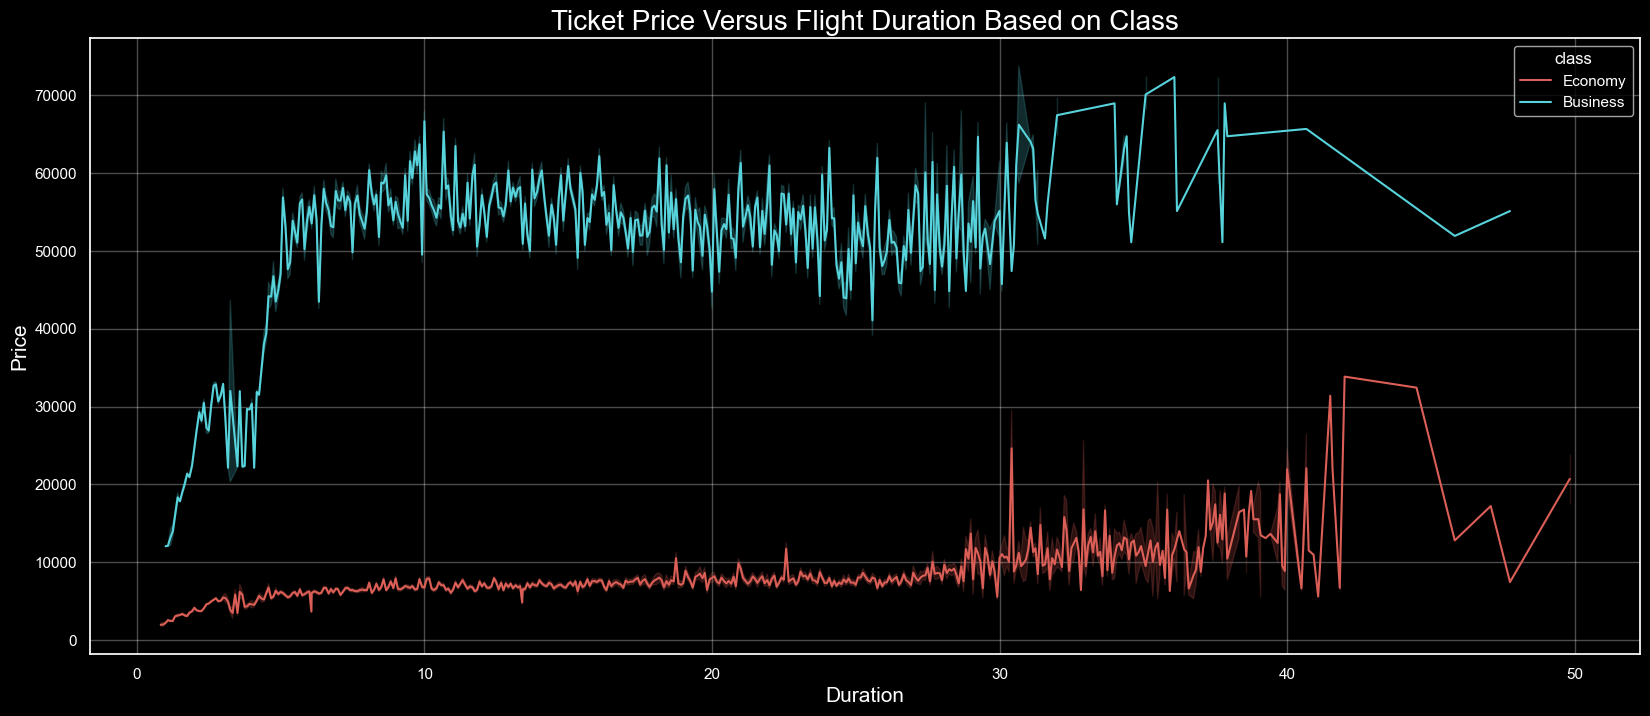

In [103]:
#Visualisation of how price varies with duration of flight
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(x='duration',y='price',data=dataset,hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(alpha=0.3)
plt.show()

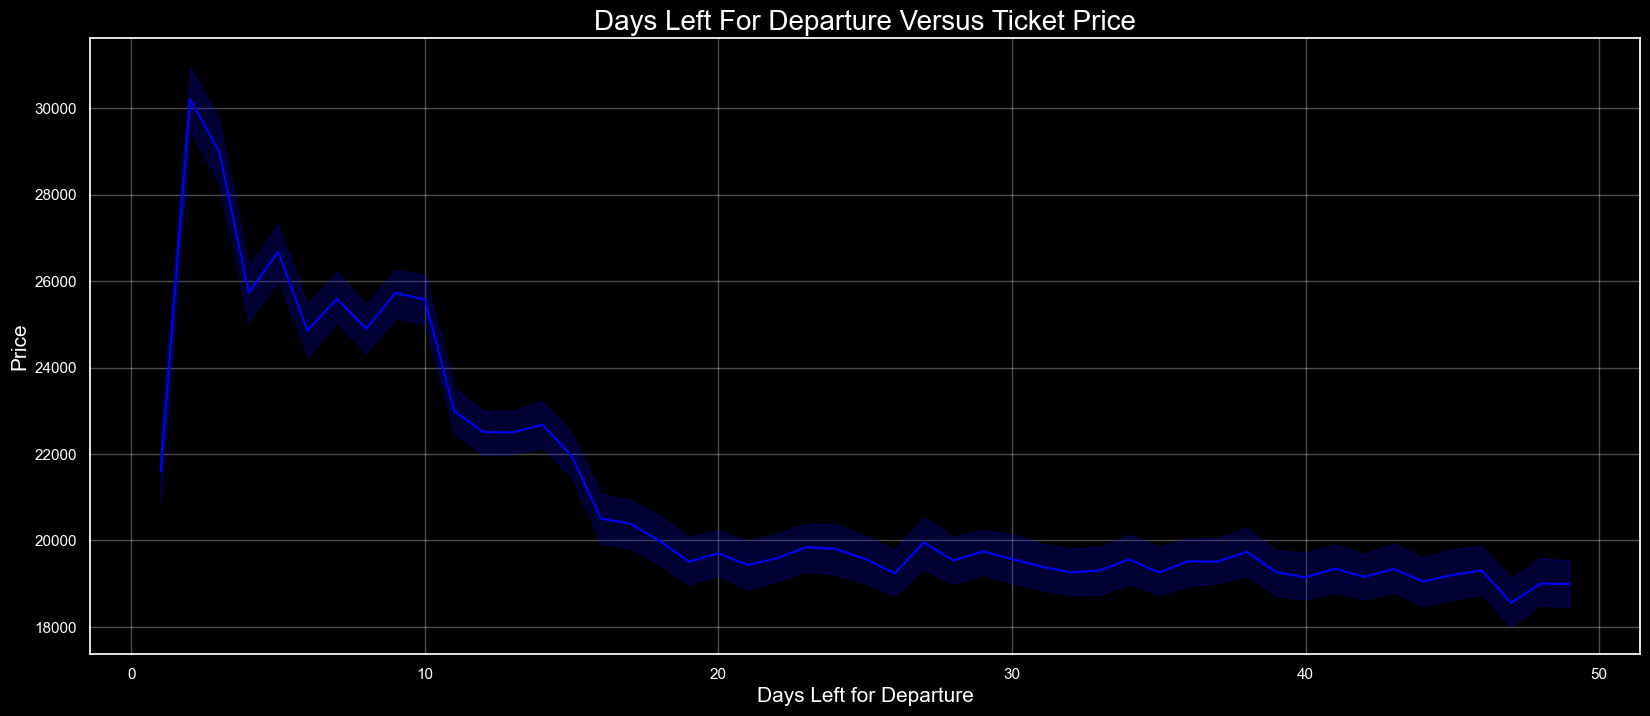

In [104]:
#Dependence of days left for departure on Price
plt.figure(figsize=(20,8))
sns.lineplot(data=dataset,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(alpha=0.3)
plt.show()

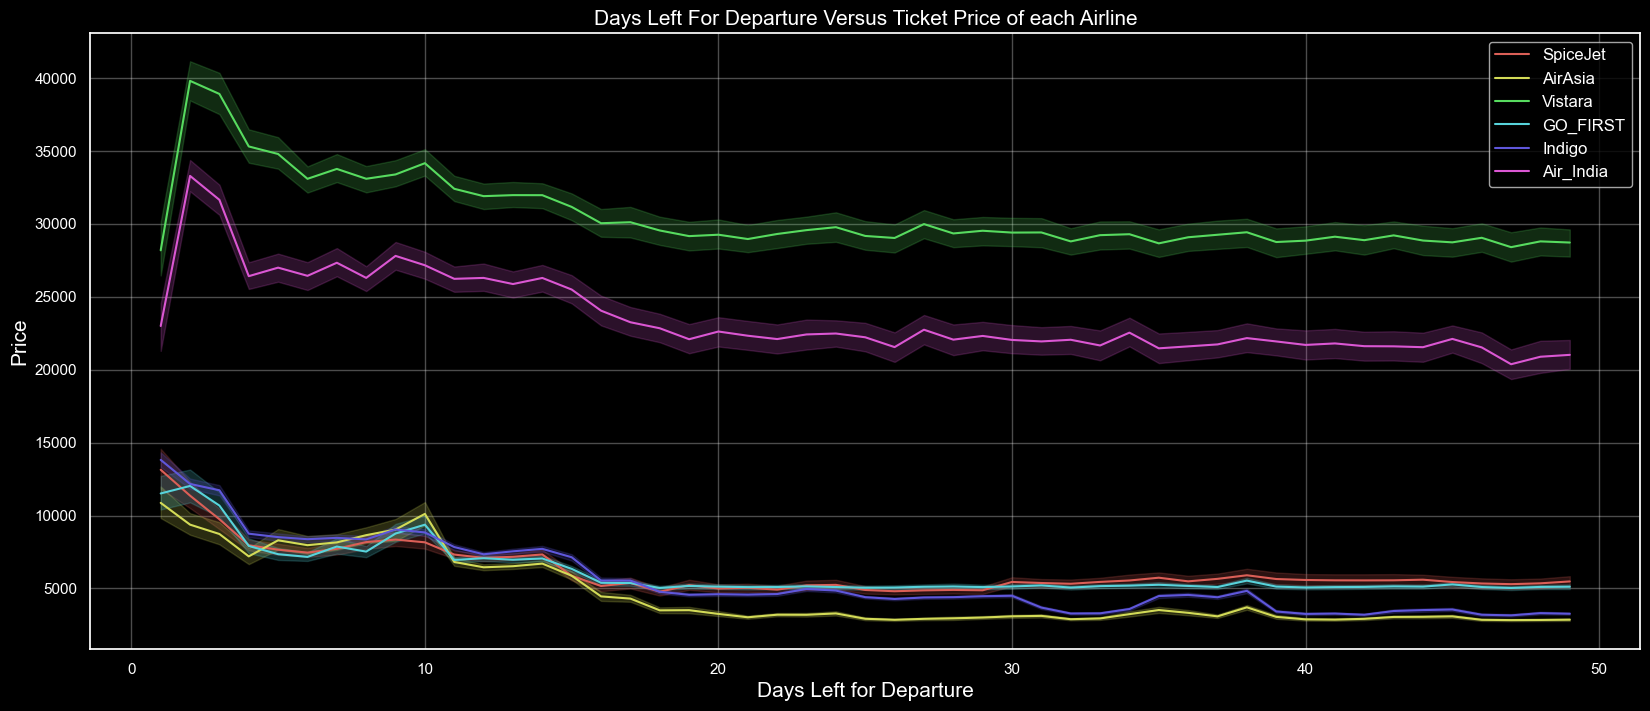

In [105]:
#To check if the price dependent on day_left is variable for different airlines

plt.figure(figsize=(20,8))
sns.lineplot(data=dataset,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(alpha=0.3)
plt.show()

In [106]:
#To count total number of fligths from one city to another

dataset.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [107]:
#Calculating avergae price of each airline from source to destination

dataset.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)


,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


# Implementing Machine Learning Models

In [201]:
#Creating a copy of the original dataframe

df=dataset.copy()

In [202]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [203]:
#Removing Redundant Columns

df=df.drop(['flight'],axis=1)

#Converting all the labelled columns to numeric format using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode = ['stops', 'class']
for col in columns_to_encode:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
        
df.describe

<bound method NDFrame.describe of          airline source_city departure_time  stops   arrival_time  \
0       SpiceJet       Delhi        Evening      2          Night   
1       SpiceJet       Delhi  Early_Morning      2        Morning   
2        AirAsia       Delhi  Early_Morning      2  Early_Morning   
3        Vistara       Delhi        Morning      2      Afternoon   
4        Vistara       Delhi        Morning      2        Morning   
...          ...         ...            ...    ...            ...   
300148   Vistara     Chennai        Morning      0        Evening   
300149   Vistara     Chennai      Afternoon      0          Night   
300150   Vistara     Chennai  Early_Morning      0          Night   
300151   Vistara     Chennai  Early_Morning      0        Evening   
300152   Vistara     Chennai        Morning      0        Evening   

       destination_city  class  duration  days_left  price  
0                Mumbai      1      2.17          1   5953  
1              

In [204]:
# Columns to encode
columns_to_encode = ['airline', 'source_city', 'destination_city', 'departure_time','destination_city','arrival_time']

# Apply One Hot Encoding
df = pd.get_dummies(df, columns=columns_to_encode)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,2,1,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,2,1,2.33,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,2,1,2.17,1,5956,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2,1,2.25,1,5955,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,2,1,2.33,1,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,10.08,49,69265,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
300149,0,0,10.42,49,77105,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300150,0,0,13.83,49,79099,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300151,0,0,10.00,49,81585,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [205]:
#Segregating the independent and dependent variable to x and y respectively
y=df['price']
x=df.drop(['price'],axis=1)
print(x)

        stops  class  duration  days_left  airline_AirAsia  airline_Air_India  \
0           2      1      2.17          1                0                  0   
1           2      1      2.33          1                0                  0   
2           2      1      2.17          1                1                  0   
3           2      1      2.25          1                0                  0   
4           2      1      2.33          1                0                  0   
...       ...    ...       ...        ...              ...                ...   
300148      0      0     10.08         49                0                  0   
300149      0      0     10.42         49                0                  0   
300150      0      0     13.83         49                0                  0   
300151      0      0     10.00         49                0                  0   
300152      0      0     10.08         49                0                  0   

        airline_GO_FIRST  a

In [206]:
#Splitting the dataframe to test and train data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 40), (90046, 40), (210107,), (90046,))

In [207]:
# #Applying feature scaling for machine learning models
# from sklearn.preprocessing import MinMaxScaler
# mmScaler=MinMaxScaler(feature_range=(0,1))
# x_train = mmScaler.fit_transform(x_train)
# x_test=mmScaler.transform(x_test)
# x_train=pd.DataFrame(x_train)
# x_test=pd.DataFrame(x_test)

# Linear Regression Model

In [208]:
y_train2 = np.log(y_train)

#Tried implementation of sclaers but that was giving negative values for price

In [209]:
from sklearn.linear_model import LinearRegression
linearRegressor=LinearRegression()
linearRegressor.fit(x_train,y_train2)
y_pred=np.exp(linearRegressor.predict(x_test))

In [210]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the combined DataFrame
print(results)

        Actual Prices  Predicted Prices
27131            7366       5874.636376
266857          64831      51593.648384
141228           6195       7349.989310
288329          60160      57567.139417
97334            6578       6892.555749
...               ...               ...
123895           6134       5695.140523
251253          67004      53949.467151
8335             2410       2454.884833
68668            2835       4343.785322
108970           3393       3400.251071

[90046 rows x 2 columns]


In [211]:
temp = results[results['Predicted Prices'] < 0]
temp

,Actual Prices,Predicted Prices


In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8725173517217385


In [213]:
results.describe()

,Actual Prices,Predicted Prices
count,90046.000000,90046.000000
mean,20874.981410,20550.674995
std,22686.388372,22911.505978
min,1105.000000,1653.016169
25%,4784.000000,5166.567097
50%,7425.000000,7155.828036
75%,42521.000000,40652.233661
max,115211.000000,109998.932662


# Decision Tree Regression Model

In [216]:
from sklearn.tree import DecisionTreeRegressor

decisionTreeRegressor=DecisionTreeRegressor()
decisionTreeRegressor.fit(x_train,y_train)
y_pred=(decisionTreeRegressor.predict(x_test))

In [217]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the combined DataFrame
print(results)

        Actual Prices  Predicted Prices
27131            7366            7366.0
266857          64831           72783.0
141228           6195            6195.0
288329          60160           60160.0
97334            6578            6578.0
...               ...               ...
123895           6134            6489.0
251253          67004           67004.0
8335             2410            2410.0
68668            2835            2835.0
108970           3393            3619.0

[90046 rows x 2 columns]


In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.9757741117919799


In [219]:
from sklearn import tree

text_representation = tree.export_text(decisionTreeRegressor)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 4.54
|   |   |--- feature_2 <= 2.04
|   |   |   |--- feature_2 <= 1.62
|   |   |   |   |--- feature_2 <= 1.38
|   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [15474.00]
|   |   |   |   |   |   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [15360.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [12000.00]
|   |   |   |

In [221]:
results.describe()

,Actual Prices,Predicted Prices
count,90046.000000,90046.000000
mean,20874.981410,20913.517978
std,22686.388372,22711.610504
min,1105.000000,1105.000000
25%,4784.000000,4783.000000
50%,7425.000000,7425.000000
75%,42521.000000,42521.000000
max,115211.000000,123071.000000


#  Random Forest Regressor

In [245]:
from sklearn.ensemble import RandomForestRegressor

randomRegressor = RandomForestRegressor()
randomRegressor.fit(x_train,y_train)
y_pred=randomRegressor.predict(x_test)


In [246]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the combined DataFrame
print(results)

        Actual Prices  Predicted Prices
27131            7366       7363.840000
266857          64831      70194.670000
141228           6195       6205.520000
288329          60160      60757.920000
97334            6578       6239.270000
...               ...               ...
123895           6134       6398.530000
251253          67004      67078.370000
8335             2410       2472.910000
68668            2835       2877.952500
108970           3393       3612.971333

[90046 rows x 2 columns]


In [224]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.9847763429316612


In [225]:
y_pred_train = randomRegressor.predict(x_train)

In [117]:
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

0.9984728652845746


In [226]:
results.describe()

,Actual Prices,Predicted Prices
count,90046.000000,90046.000000
mean,20874.981410,20917.949800
std,22686.388372,22589.601533
min,1105.000000,1105.000000
25%,4784.000000,4896.000000
50%,7425.000000,7486.645000
75%,42521.000000,42821.902500
max,115211.000000,105556.821333


# Lasso 

In [232]:
from sklearn import linear_model

lasso=linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train2)
y_pred = np.exp(lasso.predict(x_test))

In [233]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

results

,Actual Prices,Predicted Prices
27131,7366,6560.729766
266857,64831,26789.509591
141228,6195,5231.192361
288329,60160,44291.317906
97334,6578,6683.712887
...,...,...
123895,6134,5723.860750
251253,67004,34500.548616
8335,2410,4260.111523
68668,2835,4672.527130


In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7339686988577568


In [236]:
results.describe()

,Actual Prices,Predicted Prices
count,90046.000000,90046.000000
mean,20874.981410,16602.543480
std,22686.388372,15580.171330
min,1105.000000,3742.077758
25%,4784.000000,5938.366144
50%,7425.000000,7670.828231
75%,42521.000000,29376.831698
max,115211.000000,95684.607605


# Ridge

In [240]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(x_train, y_train2)
y_pred = np.exp(ridge.predict(x_test))

In [241]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

results

,Actual Prices,Predicted Prices
27131,7366,5874.754635
266857,64831,51591.813081
141228,6195,7350.081621
288329,60160,57565.771757
97334,6578,6892.674552
...,...,...
123895,6134,5695.129175
251253,67004,53947.901578
8335,2410,2454.837347
68668,2835,4343.798605


In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.8725217044954028


In [243]:
results.describe()

,Actual Prices,Predicted Prices
count,90046.000000,90046.000000
mean,20874.981410,20550.247905
std,22686.388372,22910.716461
min,1105.000000,1653.068104
25%,4784.000000,5166.650763
50%,7425.000000,7155.894063
75%,42521.000000,40651.006320
max,115211.000000,109995.339297


# K-Nearest Neighbours

In [255]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred = (KNN.predict(x_test))

In [ ]:
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

results

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

In [ ]:
results.describe

# Final Report

All the models have a decent result but the best performing models are
1. Random Forest
2. Decision Tree

In [248]:
df3=dataset.copy()
final_result=df3.merge(results,left_index=True,right_index=True)

In [250]:
final_result.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual Prices,Predicted Prices
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5953,9171.020
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5955,7863.755
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,6060,7098.795
10,GO_FIRST,G8-392,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,5954,6170.560
11,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954,5954,6449.420
12,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955,5955,6759.350
16,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955,5955,6670.750
22,GO_FIRST,G8-103,Delhi,Evening,one,Morning,Mumbai,Economy,15.67,1,5954,5954,12466.480
24,Indigo,6E-5328,Delhi,Morning,zero,Morning,Mumbai,Economy,2.50,1,6165,6165,6450.400
26,Indigo,6E-2046,Delhi,Evening,zero,Evening,Mumbai,Economy,2.17,1,6585,6585,7340.240


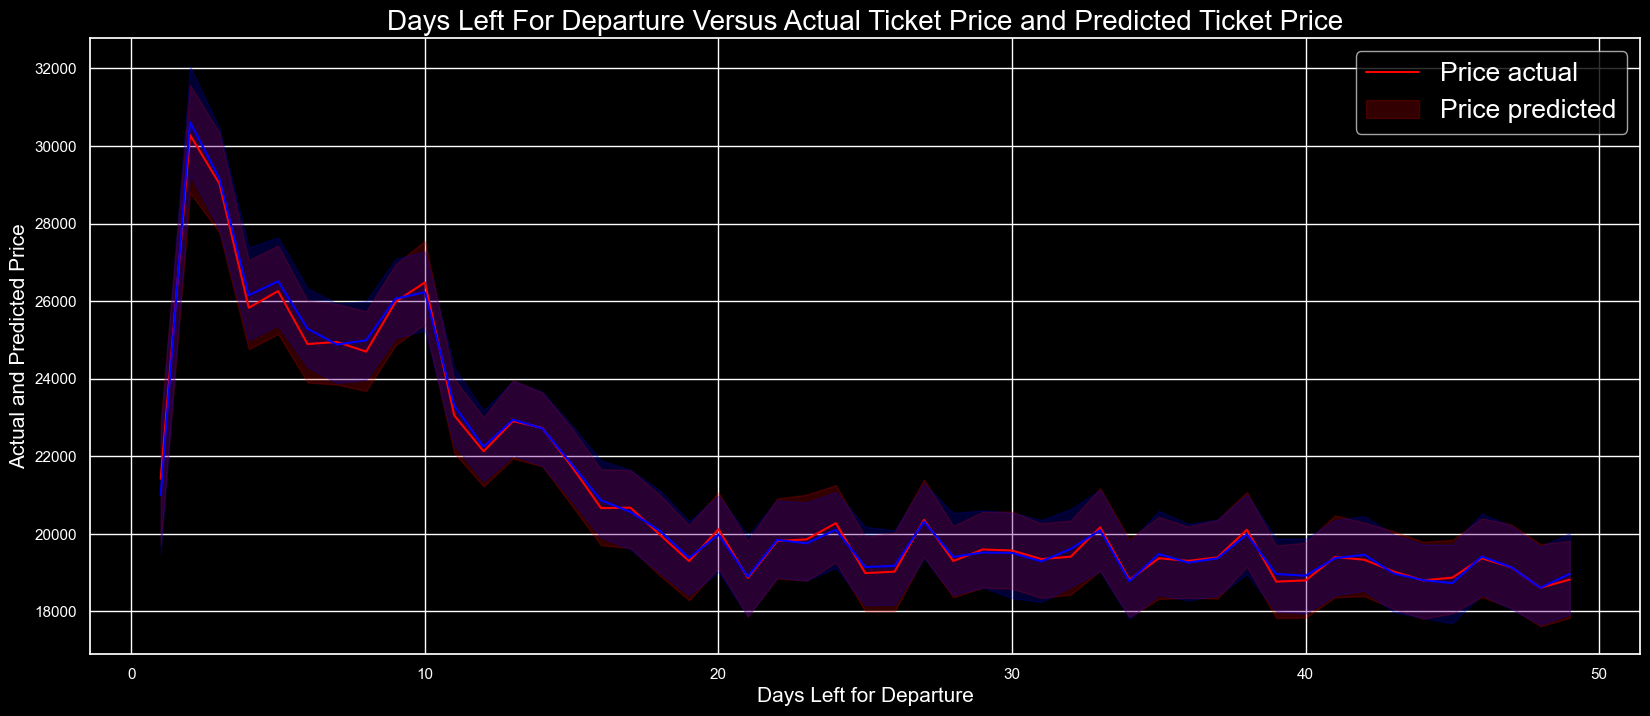

In [254]:
plt.figure(figsize=(20,8))
sns.lineplot(data=final_result,x='days_left',y='Actual Prices',color='red')
sns.lineplot(data=final_result,x='days_left',y='Predicted Prices',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()